In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt,pylab
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Featured_dataset.csv")
data.head()

,url,url_len,count_comma,count_semicolon,count_quotes,count_braces,count_redirects,count_pipes,count_dots,count_dash,count_underline,count_question,count_equal,count_attherate,count_char,count_digit,count_alphanumeric,count_non_alphanumeric,count_tlds,host_has_ip,present_ip,present_http,count_dots_host,count_digit_host,count_non_alphanumeric_host,parameter_count,parameter_length,directory_len,digit_char_ratio,vowel_consonant_ratio,avg_len_token,label
0,https://2bittechnology.in/js/mfilealldom/mfile...,72,0,0,0,0,0,0,1,0,0,0,0,0,46,20,66,6,1,1,0,0,1,1,1,0,0,55,2.3,0.241379,9.4,1
1,https://www.xporn.eventfreex.com/,25,0,0,0,0,0,0,3,0,0,0,0,0,21,1,22,4,1,1,0,0,3,1,3,0,0,1,21.0,0.315789,5.4,1
2,https://upapage.000webhostapp.com/set.html,34,0,0,0,0,0,0,3,0,0,0,0,0,27,3,30,4,1,1,0,0,2,3,2,0,0,9,9.0,0.360000,6.4,1
3,https://upapage.000webhostapp.com/sets.html?=1...,115,0,0,0,0,0,0,3,0,4,1,5,0,87,15,102,13,1,1,0,0,2,3,2,4,80,10,5.8,0.321839,14.5,1
4,https://f.samsung-lucky-winner.xyz/,27,0,0,0,0,0,0,2,2,0,0,0,0,22,1,23,5,2,1,0,0,2,1,4,0,0,1,22.0,0.227273,5.8,1


In [ ]:
data.drop('url',axis=1,inplace=True)

In [ ]:
data.shape

(997429, 31)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.label.value_counts()

0    736664
1    260765
Name: label, dtype: int64

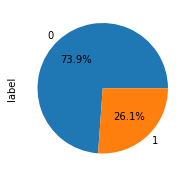

In [ ]:
data.label.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(3,3))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997429 entries, 0 to 997428
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   url_len                      997429 non-null  int64  
 1   count_comma                  997429 non-null  int64  
 2   count_semicolon              997429 non-null  int64  
 3   count_quotes                 997429 non-null  int64  
 4   count_braces                 997429 non-null  int64  
 5   count_redirects              997429 non-null  int64  
 6   count_pipes                  997429 non-null  int64  
 7   count_dots                   997429 non-null  int64  
 8   count_dash                   997429 non-null  int64  
 9   count_underline              997429 non-null  int64  
 10  count_question               997429 non-null  int64  
 11  count_equal                  997429 non-null  int64  
 12  count_attherate              997429 non-null  int64  
 13 

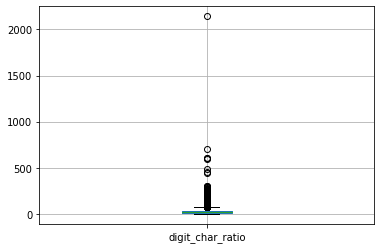

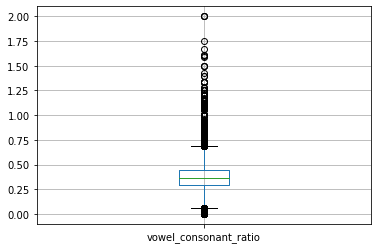

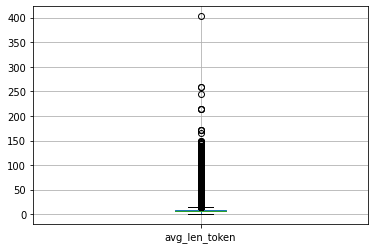

In [ ]:
float_column = data.dtypes[data.dtypes=='float64'].index
for x in float_column:
  plt.figure()
  data.boxplot([x])


In [ ]:
for x in float_column:
  desc = data[x].describe()
  IQR = desc['75%']- desc['25%']
  UT = desc['75%']+1.5*IQR
  LT = desc['25%']-1.5*IQR
  data[x][data[x]>UT] = UT

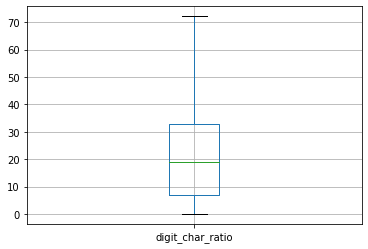

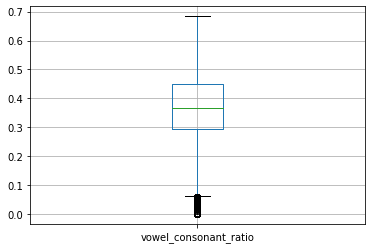

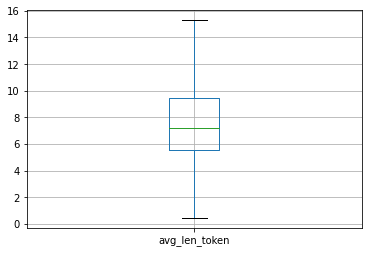

In [ ]:
float_column = data.dtypes[data.dtypes=='float64'].index
for x in float_column:
  plt.figure()
  data.boxplot([x])

In [ ]:
data.columns

Index(['url_len', 'count_comma', 'count_semicolon', 'count_quotes',
       'count_braces', 'count_redirects', 'count_pipes', 'count_dots',
       'count_dash', 'count_underline', 'count_question', 'count_equal',
       'count_attherate', 'count_char', 'count_digit', 'count_alphanumeric',
       'count_non_alphanumeric', 'count_tlds', 'host_has_ip', 'present_ip',
       'present_http', 'count_dots_host', 'count_digit_host',
       'count_non_alphanumeric_host', 'parameter_count', 'parameter_length',
       'directory_len', 'digit_char_ratio', 'vowel_consonant_ratio',
       'avg_len_token', 'label'],
      dtype='object')

In [ ]:
for x in float_column:
  desc = data['vowel_consonant_ratio'].describe()
  IQR = desc['75%']- desc['25%']
  UT = desc['75%']+1.5*IQR
  LT = desc['25%']-1.5*IQR
  data['vowel_consonant_ratio'][data['vowel_consonant_ratio']<UT] = UT

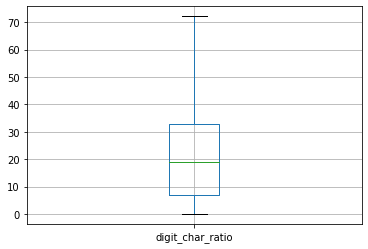

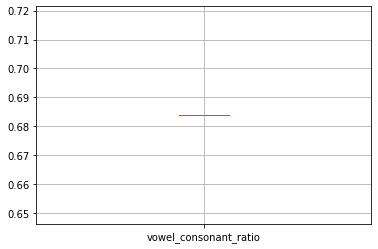

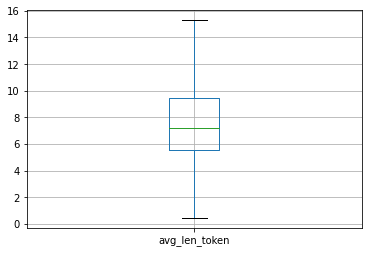

In [ ]:
float_column = data.dtypes[data.dtypes=='float64'].index
for x in float_column:
  plt.figure()
  data.boxplot([x])

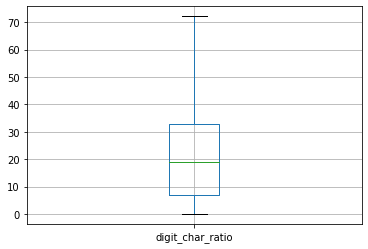

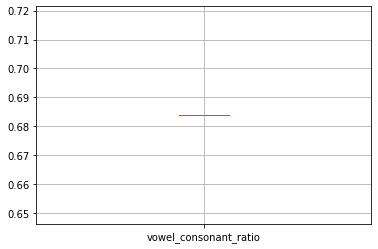

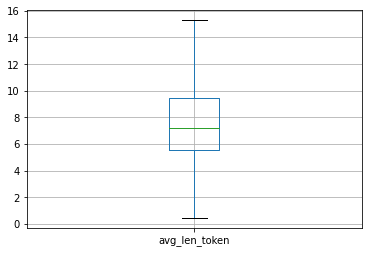

In [ ]:
int_column = data.dtypes[data.dtypes=='int64'].index
for x in float_column:
  plt.figure()
  data.boxplot([x])

In [ ]:
for x in int_column:
  desc = data[x].describe()
  IQR = desc['75%']- desc['25%']
  UT = desc['75%']+1.5*IQR
  LT = desc['25%']-1.5*IQR
  data[x][data[x]>UT] = UT

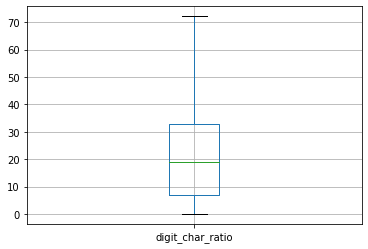

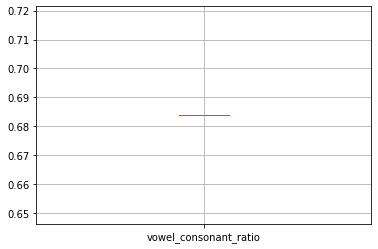

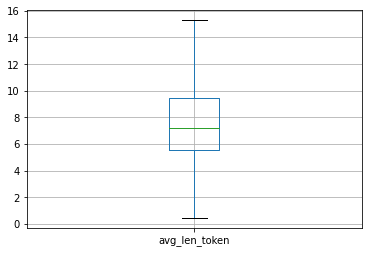

In [ ]:
int_column = data.dtypes[data.dtypes=='int64'].index
for x in float_column:
  plt.figure()
  data.boxplot([x])

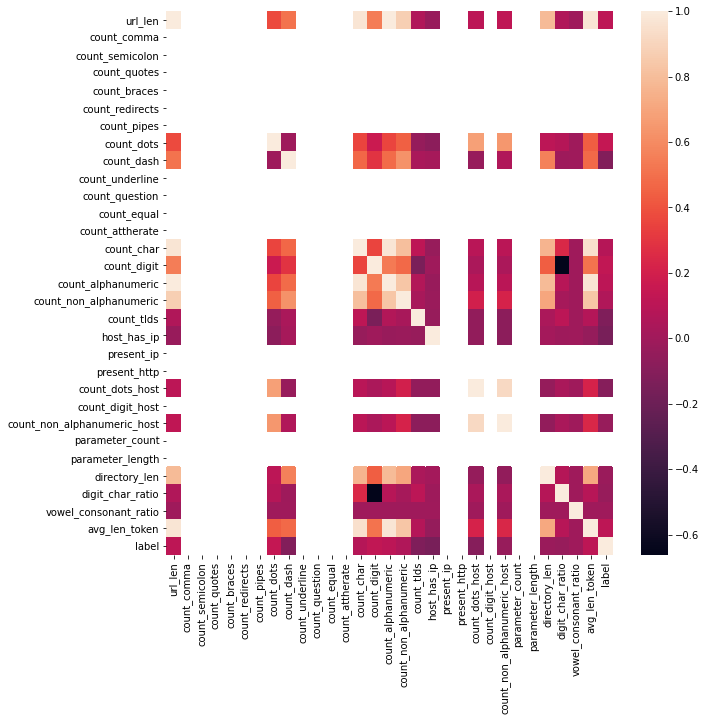

In [ ]:
cormat = data.corr()
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cormat)

In [ ]:
data.shape

(997429, 31)

In [ ]:
def correlation(data, threshold):
  col_corr = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]>threshold):
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

corr_features = correlation(data,0.85)
len(set(corr_features))
corr_features 


{'avg_len_token',
 'count_alphanumeric',
 'count_char',
 'count_non_alphanumeric',
 'count_non_alphanumeric_host'}

In [ ]:
data.drop(corr_features,axis=1,inplace=True)

In [ ]:
data.shape

(997429, 26)

In [ ]:
x = data.drop('label',axis=1)

In [ ]:
y= data['label']

In [ ]:
smk = SMOTETomek(random_state=42)
x_res,y_res = smk.fit_sample(x,y)

In [ ]:
x_res.shape,y_res.shape

((1468140, 25), (1468140,))

In [ ]:
print("Orginal data {}".format(Counter(y)))
print("Smotetomek data {}".format(Counter(y_res)))

Orginal data Counter({0: 736664, 1: 260765})
Smotetomek data Counter({1: 734070, 0: 734070})


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.30,random_state = 42)

In [ ]:
Pca =  PCA(n_components=5)

In [ ]:
x_train = Pca.fit_transform(x_train)

In [ ]:
x_train.shape

(1027698, 5)

In [ ]:
x_test = Pca.transform(x_test)

In [ ]:
x_test.shape

(440442, 5)

In [ ]:
svc = SVC()

In [ ]:
# parameters = {'C':[0.001,0.1,10],'gamma':[0.1,0.01],'kernal':['linear', 'rbf', 'sigmoid']}

In [ ]:
Parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 20]},
                    {'kernel': ['linear'], 'C': [1, 10, 20]}]

In [ ]:
grid = GridSearchCV(estimator=svc,param_grid=Parameters,cv=5,n_jobs=-1)

In [ ]:
grid.fit(x_train,y_train)